## Fractional variance plot

Created by: Fouzia Fahrin (ffahrin@iastate.edu)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker


from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from datetime import datetime

import tol_colors as tc

ERROR 1: PROJ: proj_create_from_database: Open of /opt/miniconda3/envs/prod/share/proj failed


In [1]:
figfolder = './'

In [3]:
dri = '/lss/research/agon-lab/IMERG-daily/NASA_interpolated/'
fn = 'IMERG_20000601-20210930_anom_final_stdz.nc'

data = xr.open_dataset(dri+fn)#, engine='netcdf4')
time_all = data['time']

In [4]:
dri = '/home/agon/Fouzia_test/equ_waves/'
fn = 'IMERG_20000601-20210930_filt_Kelvin_stdz.nc'
data_kvw = xr.open_dataset(dri+fn)


fn = 'IMERG_20000601-20210930_filt_IG0_stdz.nc'
data_ig0 = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_TD-type_stdz.nc'
data_tdt = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_ER_stdz.nc'
data_erw = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_MRG_stdz.nc'
data_mrg = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_MJO_stdz.nc'
data_mjo = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_IG1_stdz.nc'
data_ig1 = xr.open_dataset(dri+fn)

In [5]:
lats = -20
latn = 20.
lonw = 225 #75-135
lone = 285

mn0 = 2
mnf = 4
yr0 = 2001
yrf = 2020
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

In [6]:
time_all1 = data['time']

In [7]:
# set up conditional statements 
cond1_fma = (time_all1['time.month'] >= mn0) & (time_all1['time.month'] <= mnf) # season of interest
cond2_fma = (time_all1['time.year'] <= yrf) & (time_all1['time.year'] >= yr0) # season of interest
# now find only the times when MJO amplitude is in season of interest AND exceeds some threshold
time_fma = time_all1.where((cond1_fma)& (cond2_fma), drop=True) 

In [8]:
mn0 = 5
mnf = 7
yr0 = 2001
yrf = 2020
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

In [9]:
cond1_MJJ = (time_all['time.month'] >= mn0) & (time_all['time.month'] <= mnf) # season of interest
cond2_MJJ = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
# now find only the times when MJO amplitude is in season of interest AND exceeds some threshold
time_MJJ = time_all.where((cond1_MJJ)& (cond2_MJJ), drop=True) 

In [10]:
mn0 = 8
mnf = 10
yr0 = 2001
yrf = 2020
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

In [11]:
cond1_ASO = (time_all['time.month'] >= mn0) & (time_all['time.month'] <= mnf) # season of interest
cond2_ASO = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
# now find only the times when MJO amplitude is in season of interest AND exceeds some threshold
time_ASO = time_all.where((cond1_ASO)& (cond2_ASO), drop=True) 

In [12]:
yr0 = 2001
yrf = 2020
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

mn0 = 11
mnf = 1

In [13]:
# set up conditional statements 

if mn0 > mnf:
    cond1 = (time_all['time.month'] >= mn0) & (time_all['time.year'] <= yrf-1) # season of interest
    cond2 = (time_all['time.month'] <= mnf) & (time_all['time.year'] >= yr0) # season of interest
    time_NDJ = time_all.where((cond1) | (cond2), drop=True) 
elif mn0 < mnf:
    cond1 = (time_all['time.month'] >= mn0) & (time_all['time.month'] <= mnf) # season of interest
    cond2 = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
    time_NDJ = time_all.where((cond1) & (cond2), drop=True) 
else:
    cond1 = (time_all['time.month'] == mn0) # season of interest
    cond2 = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
    time_NDJ = time_all.where((cond1) & (cond2), drop=True) 

time_NDJ

<xarray.DataArray 'time' (time: 1871)>
array(['2000-11-01T00:00:00.000000000', '2000-11-02T00:00:00.000000000',
       '2000-11-03T00:00:00.000000000', ...,
       '2021-01-29T00:00:00.000000000', '2021-01-30T00:00:00.000000000',
       '2021-01-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-11-01 2000-11-02 ... 2021-01-31
Attributes:
    standard_name:  time
    axis:           T

In [78]:
pr1 = data_kvw['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time'))

pr2 = data_ig0['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time'))

pr3 = data_tdt['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time'))

pr4 = data_erw['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time'))

pr5 = data_mrg['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time'))

pr6 = data_mjo['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time'))

pr7 = data_ig1['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time'))

In [128]:
pr1_map = pr1*100

pr2_map = pr2*100

pr3_map = pr3*100

pr4_map = pr4*100

pr5_map = pr5*100

pr6_map = pr6*100

pr7_map = pr7*100

In [14]:
lev_pr1 = np.arange(1,25,1)

In [15]:
lats_eq = -20
latn_eq = 20.
lonw_eq = 225
lone_eq = 285

In [16]:
kelvin_fma = data_kvw['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
kelvin_MJJ = data_kvw['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
kelvin_ASO = data_kvw['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
kelvin_NDJ = data_kvw['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [17]:
ER_fma = data_erw['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
ER_MJJ = data_erw['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
ER_ASO = data_erw['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
ER_NDJ = data_erw['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [18]:
MRG_fma = data_mrg['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
MRG_MJJ = data_mrg['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
MRG_ASO = data_mrg['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
MRG_NDJ = data_mrg['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [19]:
IG0_fma = data_ig0['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
IG0_MJJ = data_ig0['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
IG0_ASO = data_ig0['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
IG0_NDJ = data_ig0['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [20]:
IG1_fma = data_ig1['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
IG1_MJJ = data_ig1['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
IG1_ASO = data_ig1['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
IG1_NDJ = data_ig1['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [21]:
MJO_fma = data_mjo['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
MJO_MJJ = data_mjo['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
MJO_ASO = data_mjo['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
MJO_NDJ = data_mjo['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [22]:
TD_fma = data_tdt['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
TD_MJJ = data_tdt['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
TD_ASO = data_tdt['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
TD_NDJ = data_tdt['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [25]:
per_kelvin_fma = kelvin_fma*100
per_kelvin_MJJ = kelvin_MJJ*100
per_kelvin_ASO = kelvin_ASO*100
per_kelvin_NDJ = kelvin_NDJ*100

In [26]:
per_ER_fma = ER_fma*100
per_ER_MJJ = ER_MJJ*100
per_ER_ASO = ER_ASO*100
per_ER_NDJ = ER_NDJ*100

In [27]:
per_MRG_fma = MRG_fma*100
per_MRG_MJJ = MRG_MJJ*100
per_MRG_ASO = MRG_ASO*100
per_MRG_NDJ = MRG_NDJ*100

In [28]:
per_IG0_fma = IG0_fma*100
per_IG0_MJJ = IG0_MJJ*100
per_IG0_ASO = IG0_ASO*100
per_IG0_NDJ = IG0_NDJ*100

In [29]:
per_IG1_fma = IG1_fma*100
per_IG1_MJJ = IG1_MJJ*100
per_IG1_ASO = IG1_ASO*100
per_IG1_NDJ = IG1_NDJ*100

In [30]:
per_MJO_fma = MJO_fma*100
per_MJO_MJJ = MJO_MJJ*100
per_MJO_ASO = MJO_ASO*100
per_MJO_NDJ = MJO_NDJ*100

In [31]:
per_TD_fma = TD_fma*100
per_TD_MJJ = TD_MJJ*100
per_TD_ASO = TD_ASO*100
per_TD_NDJ = TD_NDJ*100

In [79]:
total_fma = np.round((per_kelvin_fma+per_ER_fma+per_MRG_fma+per_IG0_fma+per_IG1_fma+per_MJO_fma+per_TD_fma), decimals=1)
total_MJJ = np.round((per_kelvin_MJJ+per_ER_MJJ+per_MRG_MJJ+per_IG0_MJJ+per_IG1_MJJ+per_MJO_MJJ+per_TD_MJJ), decimals=1)
total_ASO = np.round((per_kelvin_ASO+per_ER_ASO+per_MRG_ASO+per_IG0_ASO+per_IG1_ASO+per_MJO_ASO+per_TD_ASO), decimals=1)
total_NDJ = np.round((per_kelvin_NDJ+per_ER_NDJ+per_MRG_NDJ+per_IG0_NDJ+per_IG1_NDJ+per_MJO_NDJ+per_TD_NDJ), decimals=1)

In [80]:
MJJ_prc = np.array([per_kelvin_MJJ.values,per_IG0_MJJ.values,per_TD_MJJ.values, per_ER_MJJ.values, per_MRG_MJJ.values,  per_MJO_MJJ.values,per_IG1_MJJ.values])

In [81]:
fma_prc = np.array([per_kelvin_fma.values,per_IG0_fma.values,per_TD_fma.values, per_ER_fma.values, per_MRG_fma.values, per_MJO_fma.values, per_IG1_fma.values])

In [82]:
ASO_prc = np.array([per_kelvin_ASO.values, per_IG0_ASO.values,per_TD_ASO.values,per_ER_ASO.values, per_MRG_ASO.values, per_MJO_ASO.values,  per_IG1_ASO.values])

In [83]:
NDJ_prc = np.array([per_kelvin_NDJ.values,per_IG0_NDJ.values,per_TD_NDJ.values, per_ER_NDJ.values, per_MRG_NDJ.values, per_MJO_NDJ.values,  per_IG1_NDJ.values])

In [85]:
title = ['EQ-20$^{\circ}$S','EQ-20$^{\circ}$N','20$^{\circ}$N-20$^{\circ}$S']

In [86]:
name = ['EQ-20S','EQ-20N','20N-20S']
fs =30

In [87]:
lats_eq_NH = 0.
latn_eq_NH = 20.
lonw_eq = 225
lone_eq = 285

In [88]:
lats_eq_SH = -20.
latn_eq_SH = 0.

In [89]:
kelvin_fma_NH = data_kvw['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))#.
kelvin_MJJ_NH = data_kvw['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))#
kelvin_ASO_NH = data_kvw['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))#.
kelvin_NDJ_NH = data_kvw['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))#.

In [90]:
kelvin_fma_SH = data_kvw['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
kelvin_MJJ_SH = data_kvw['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
kelvin_ASO_SH = data_kvw['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
kelvin_NDJ_SH = data_kvw['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [91]:
ER_fma_NH = data_erw['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
ER_MJJ_NH = data_erw['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
ER_ASO_NH = data_erw['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
ER_NDJ_NH = data_erw['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [92]:
ER_fma_SH = data_erw['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
ER_MJJ_SH = data_erw['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
ER_ASO_SH = data_erw['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
ER_NDJ_SH = data_erw['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [93]:
MRG_fma_NH = data_mrg['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
MRG_MJJ_NH = data_mrg['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
MRG_ASO_NH = data_mrg['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
MRG_NDJ_NH = data_mrg['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [94]:
MRG_fma_SH = data_mrg['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
MRG_MJJ_SH = data_mrg['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
MRG_ASO_SH = data_mrg['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
MRG_NDJ_SH = data_mrg['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [95]:
IG0_fma_NH = data_ig0['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
IG0_MJJ_NH = data_ig0['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
IG0_ASO_NH = data_ig0['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
IG0_NDJ_NH = data_ig0['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [96]:
IG0_fma_SH = data_ig0['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
IG0_MJJ_SH = data_ig0['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
IG0_ASO_SH = data_ig0['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
IG0_NDJ_SH = data_ig0['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [97]:
IG1_fma_NH = data_ig1['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
IG1_MJJ_NH = data_ig1['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
IG1_ASO_NH = data_ig1['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
IG1_NDJ_NH = data_ig1['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [98]:
IG1_fma_SH = data_ig1['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
IG1_MJJ_SH = data_ig1['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
IG1_ASO_SH = data_ig1['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
IG1_NDJ_SH = data_ig1['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [99]:
MJO_fma_NH = data_mjo['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
MJO_MJJ_NH = data_mjo['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
MJO_ASO_NH = data_mjo['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
MJO_NDJ_NH = data_mjo['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [100]:
MJO_fma_SH = data_mjo['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
MJO_MJJ_SH = data_mjo['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
MJO_ASO_SH = data_mjo['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
MJO_NDJ_SH = data_mjo['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [101]:
TD_fma_NH = data_tdt['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
TD_MJJ_NH = data_tdt['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
TD_ASO_NH = data_tdt['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
TD_NDJ_NH = data_tdt['precipitationCal'].sel(lat=slice(lats_eq_NH,latn_eq_NH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [102]:
TD_fma_SH = data_tdt['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
TD_MJJ_SH = data_tdt['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_MJJ).var(dim=('time')).mean(dim=('lat','lon'))
TD_ASO_SH = data_tdt['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_ASO).var(dim=('time')).mean(dim=('lat','lon'))
TD_NDJ_SH = data_tdt['precipitationCal'].sel(lat=slice(lats_eq_SH,latn_eq_SH),lon=slice(lonw_eq,lone_eq), time=time_NDJ).var(dim=('time')).mean(dim=('lat','lon'))

In [103]:
per_kelvin_fma_NH = kelvin_fma_NH*100
per_kelvin_MJJ_NH = kelvin_MJJ_NH*100
per_kelvin_ASO_NH = kelvin_ASO_NH*100
per_kelvin_NDJ_NH = kelvin_NDJ_NH*100

In [104]:
per_kelvin_fma_SH = kelvin_fma_SH*100
per_kelvin_MJJ_SH = kelvin_MJJ_SH*100
per_kelvin_ASO_SH = kelvin_ASO_SH*100
per_kelvin_NDJ_SH = kelvin_NDJ_SH*100

In [105]:
per_ER_fma_NH = ER_fma_NH*100
per_ER_MJJ_NH = ER_MJJ_NH*100
per_ER_ASO_NH = ER_ASO_NH*100
per_ER_NDJ_NH = ER_NDJ_NH*100

In [106]:
per_ER_fma_SH = ER_fma_SH*100
per_ER_MJJ_SH = ER_MJJ_SH*100
per_ER_ASO_SH = ER_ASO_SH*100
per_ER_NDJ_SH = ER_NDJ_SH*100

In [107]:
per_MRG_fma_NH = MRG_fma_NH*100
per_MRG_MJJ_NH = MRG_MJJ_NH*100
per_MRG_ASO_NH = MRG_ASO_NH*100
per_MRG_NDJ_NH = MRG_NDJ_NH*100

In [108]:
per_MRG_fma_SH = MRG_fma_SH*100
per_MRG_MJJ_SH = MRG_MJJ_SH*100
per_MRG_ASO_SH = MRG_ASO_SH*100
per_MRG_NDJ_SH = MRG_NDJ_SH*100

In [109]:
per_IG0_fma_NH = IG0_fma_NH*100
per_IG0_MJJ_NH = IG0_MJJ_NH*100
per_IG0_ASO_NH = IG0_ASO_NH*100
per_IG0_NDJ_NH = IG0_NDJ_NH*100

In [110]:
per_IG0_fma_SH = IG0_fma_SH*100
per_IG0_MJJ_SH = IG0_MJJ_SH*100
per_IG0_ASO_SH = IG0_ASO_SH*100
per_IG0_NDJ_SH = IG0_NDJ_SH*100

In [111]:
per_IG1_fma_NH = IG1_fma_NH*100
per_IG1_MJJ_NH = IG1_MJJ_NH*100
per_IG1_ASO_NH = IG1_ASO_NH*100
per_IG1_NDJ_NH = IG1_NDJ_NH*100

In [112]:
per_IG1_fma_SH = IG1_fma_SH*100
per_IG1_MJJ_SH = IG1_MJJ_SH*100
per_IG1_ASO_SH = IG1_ASO_SH*100
per_IG1_NDJ_SH = IG1_NDJ_SH*100

In [113]:
per_MJO_fma_NH = MJO_fma_NH*100
per_MJO_MJJ_NH = MJO_MJJ_NH*100
per_MJO_ASO_NH = MJO_ASO_NH*100
per_MJO_NDJ_NH = MJO_NDJ_NH*100

In [114]:
per_MJO_fma_SH = MJO_fma_SH*100
per_MJO_MJJ_SH = MJO_MJJ_SH*100
per_MJO_ASO_SH = MJO_ASO_SH*100
per_MJO_NDJ_SH = MJO_NDJ_SH*100

In [115]:
per_TD_fma_NH = TD_fma_NH*100
per_TD_MJJ_NH = TD_MJJ_NH*100
per_TD_ASO_NH = TD_ASO_NH*100
per_TD_NDJ_NH = TD_NDJ_NH*100

In [116]:
per_TD_fma_SH = TD_fma_SH*100
per_TD_MJJ_SH = TD_MJJ_SH*100
per_TD_ASO_SH = TD_ASO_SH*100
per_TD_NDJ_SH = TD_NDJ_SH*100

In [117]:
total_fma_NH = np.round((per_kelvin_fma_NH+per_ER_fma_NH+per_MRG_fma_NH+per_IG0_fma_NH+per_IG1_fma_NH+per_MJO_fma_NH+per_TD_fma_NH), decimals=1)
total_MJJ_NH = np.round((per_kelvin_MJJ_NH+per_ER_MJJ_NH+per_MRG_MJJ_NH+per_IG0_MJJ_NH+per_IG1_MJJ_NH+per_MJO_MJJ_NH+per_TD_MJJ_NH), decimals=1)
total_ASO_NH = np.round((per_kelvin_ASO_NH+per_ER_ASO_NH+per_MRG_ASO_NH+per_IG0_ASO_NH+per_IG1_ASO_NH+per_MJO_ASO_NH+per_TD_ASO_NH), decimals=1)
total_NDJ_NH = np.round((per_kelvin_NDJ_NH+per_ER_NDJ_NH+per_MRG_NDJ_NH+per_IG0_NDJ_NH+per_IG1_NDJ_NH+per_MJO_NDJ_NH+per_TD_NDJ_NH), decimals=1)

In [118]:
total_fma_SH = np.round((per_kelvin_fma_SH+per_ER_fma_SH+per_MRG_fma_SH+per_IG0_fma_SH+per_IG1_fma_SH+per_MJO_fma_SH+per_TD_fma_SH), decimals=1)
total_MJJ_SH = np.round((per_kelvin_MJJ_SH+per_ER_MJJ_SH+per_MRG_MJJ_SH+per_IG0_MJJ_SH+per_IG1_MJJ_SH+per_MJO_MJJ_SH+per_TD_MJJ_SH), decimals=1)
total_ASO_SH = np.round((per_kelvin_ASO_SH+per_ER_ASO_SH+per_MRG_ASO_SH+per_IG0_ASO_SH+per_IG1_ASO_SH+per_MJO_ASO_SH+per_TD_ASO_SH), decimals=1)
total_NDJ_SH = np.round((per_kelvin_NDJ_SH+per_ER_NDJ_SH+per_MRG_NDJ_SH+per_IG0_NDJ_SH+per_IG1_NDJ_SH+per_MJO_NDJ_SH+per_TD_NDJ_SH), decimals=1)

In [119]:
fma_prc_NH = np.array([per_kelvin_fma_NH.values,per_IG0_fma_NH.values,per_TD_fma_NH.values, per_ER_fma_NH.values, per_MRG_fma_NH.values, per_MJO_fma_NH.values,per_IG1_fma_NH.values])

In [120]:
fma_prc_SH = np.array([per_kelvin_fma_SH.values,per_IG0_fma_SH.values,per_TD_fma_SH.values, per_ER_fma_SH.values, per_MRG_fma_SH.values, per_MJO_fma_SH.values, per_IG1_fma_SH.values])

In [121]:
data = [list(fma_prc.flatten()),
list(MJJ_prc.flatten()),
list(ASO_prc.flatten()),
list(NDJ_prc.flatten())]

In [122]:
data_eq= [list(fma_prc_NH.flatten()),
list(fma_prc_SH.flatten())]

In [123]:
label=['FMA ('+str(total_fma.values)+'%)','MJJ ('+str(total_MJJ.values)+'%)', 'ASO ('+str(total_ASO.values)+'%)','NDJ ('+str(total_NDJ.values)+'%)']

In [124]:
label_eq=['EQ-20$^{\circ}$N ('+str(total_fma_NH.values)+'%)','EQ-20$^{\circ}$S ('+str(total_fma_SH.values)+'%)']

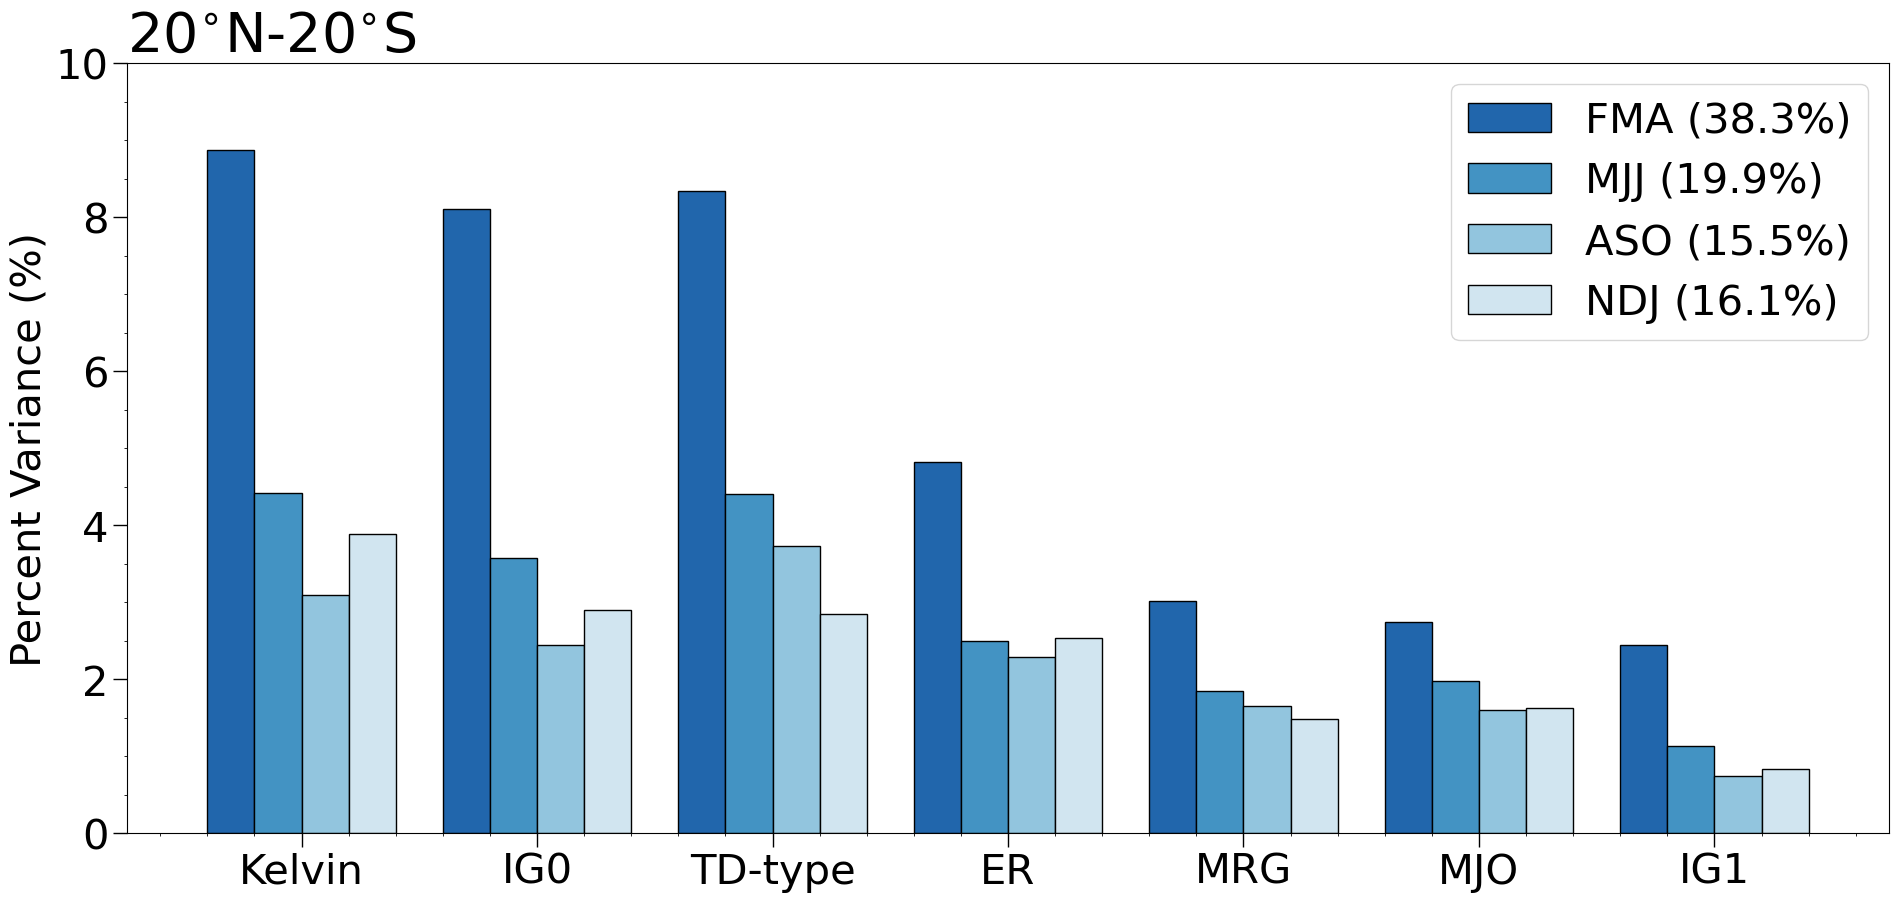

In [126]:
npan = 1
wid=.2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(50,10))#, tight_layout='true')
for j in range(0,npan,1):
    ax1 = fig.add_subplot(npan,2,j+1)
    plt.minorticks_on()
    ax1.tick_params(axis='both', which='major', length=10, width=1, direction='out', labelsize=fs)
    ax1.tick_params(axis='x', labelsize=fs)
    ax1.tick_params(axis='y', labelsize=fs)
    if j == 0:
        X=['Kelvin', 'IG0','TD-type','ER','MRG','MJO','IG1']
        X_axis = np.arange(len(X))
        color=['#2166AC', '#4393C3', '#92C5DE', '#D1E5F0']
        plt0= plt.bar(X_axis, data[0], color = color[0],width = wid,edgecolor= "k", label=label[0])
        plt1= plt.bar(X_axis+wid, data[1], color = color[1], width = wid,edgecolor= "k",label=label[1])
        plt2= plt.bar(X_axis+(wid*2), data[2], color = color[2], width = wid,edgecolor= "k",label=label[2])
        plt3= plt.bar(X_axis+(wid*3), data[3], color = color[3], width = wid,edgecolor= "k",label=label[3])
        
        plt.xticks(((X_axis+wid)+(X_axis+(wid*2)))/2, X)
        plt.yticks(np.arange(0, 12, 2),rotation=0, fontsize=fs)
        plt.legend(loc="upper right", fontsize =fs)
        plt.ylabel("Percent Variance (%)",fontsize=fs)
        plt.title(title[2],fontsize=40, loc="left")
        
#plt.savefig(figfolder+'Espc_fracvar_histogram_all_yr.pdf',bbox_inches="tight",transparent=False)        

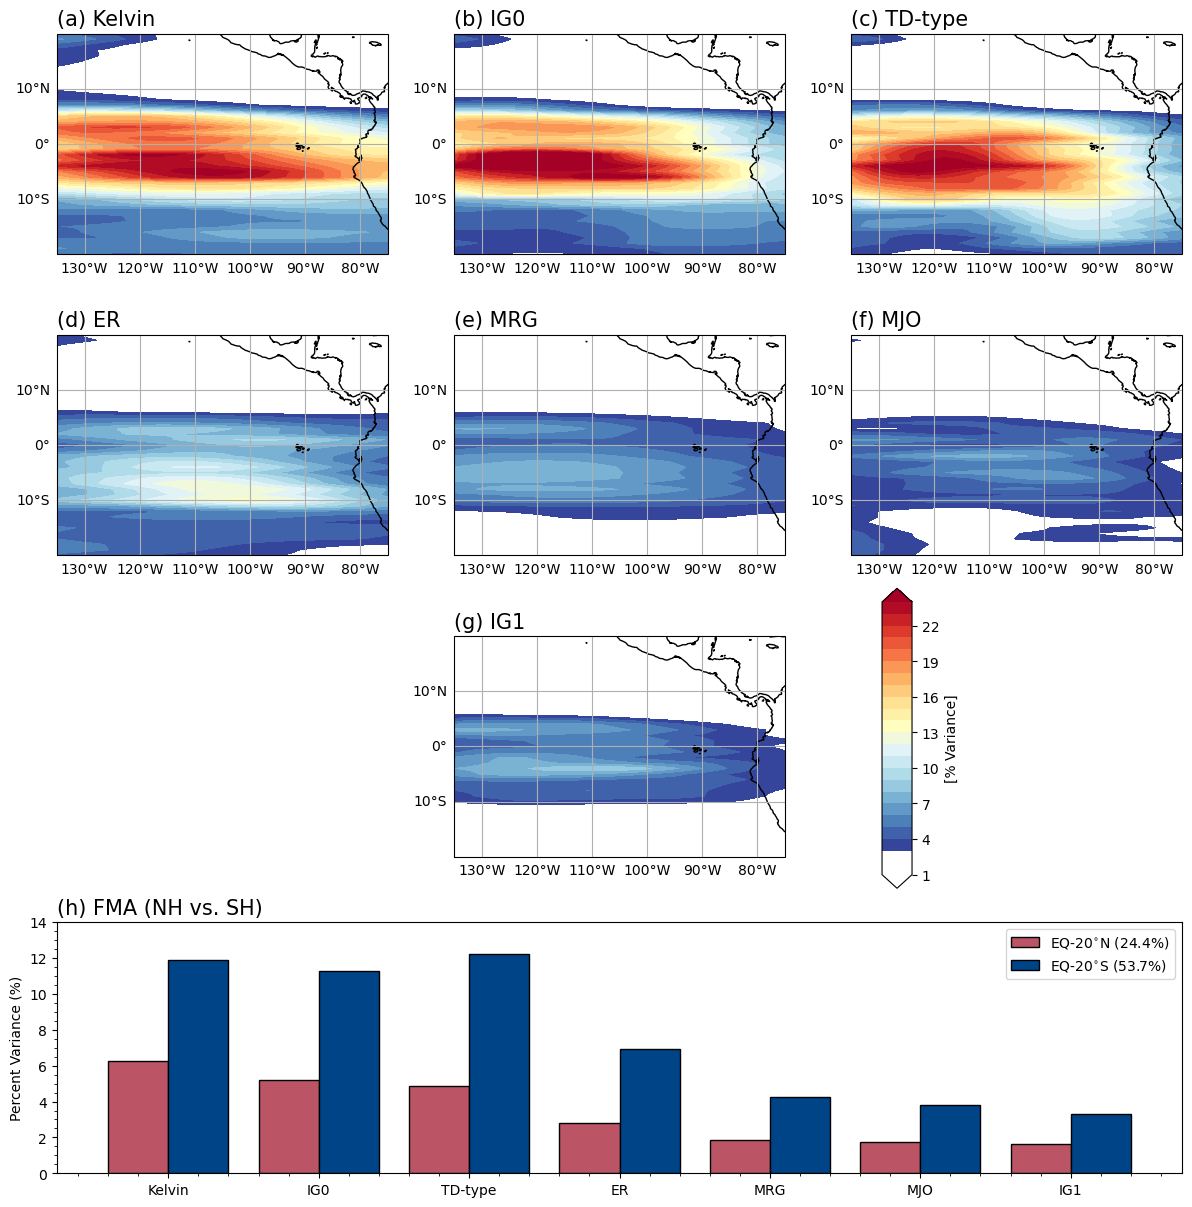

In [132]:
cmap = plt.matplotlib.colormaps.get_cmap('RdYlBu').reversed()
#cmap = plt.cm.get_cmap('Blues').copy()
v=3
fig = plt.figure(figsize=(30,15))#,tight_layout='true')
gs = gridspec.GridSpec(4, 3)

ax1 = plt.subplot(gs[0, 0],projection=ccrs.PlateCarree(central_longitude=180.))
ax1.coastlines('50m')
gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80])
gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
plt.title('(a) Kelvin', loc='left',fontsize=15)
cf = plt.contourf(pr1_map['lon'], pr1_map['lat'], pr1_map, cmap=cmap, vmin=v, transform=ccrs.PlateCarree(),levels=lev_pr1, extend ='both')
cmap = cf.get_cmap()
cmap.set_under('w')
cf.set_cmap(cmap)

ax2 = plt.subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180.))
ax2.coastlines('50m')
gl = ax2.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80])
gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
plt.title('(b) IG0', loc='left',fontsize=15)
cf = plt.contourf(pr2_map['lon'], pr2_map['lat'], pr2_map, cmap=cmap, vmin=v, transform=ccrs.PlateCarree(),levels=lev_pr1, extend ='both')
cf.cmap.set_under("white")

ax3 = plt.subplot(gs[0, 2],projection=ccrs.PlateCarree(central_longitude=180.))
ax3.coastlines('50m')
gl = ax3.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80])
gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
plt.title('(c) TD-type', loc='left',fontsize=15)
cf = plt.contourf(pr3_map['lon'], pr3_map['lat'], pr3_map, cmap=cmap, vmin=v, transform=ccrs.PlateCarree(),levels=lev_pr1, extend ='both')
cf.cmap.set_under("white")

ax4 = plt.subplot(gs[1, 0],projection=ccrs.PlateCarree(central_longitude=180.))
ax4.coastlines('50m')
gl = ax4.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80])
gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
plt.title('(d) ER', loc='left',fontsize=15)
cf = plt.contourf(pr4_map['lon'], pr4_map['lat'], pr4_map, cmap=cmap, vmin=v, transform=ccrs.PlateCarree(),levels=lev_pr1, extend ='both')
cf.cmap.set_under("white")

ax5 = plt.subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=180.))
ax5.coastlines('50m')
gl = ax5.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80])
gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
plt.title('(e) MRG', loc='left',fontsize=15)
cf = plt.contourf(pr5_map['lon'], pr5_map['lat'], pr5_map, cmap=cmap, vmin=v, transform=ccrs.PlateCarree(),levels=lev_pr1, extend ='both')
cf.cmap.set_under("white")

ax6 = plt.subplot(gs[1,2],projection=ccrs.PlateCarree(central_longitude=180.))
ax6.coastlines('50m')
gl = ax6.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80])
gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
plt.title('(f) MJO', loc='left',fontsize=15)
cf = plt.contourf(pr6_map['lon'], pr6_map['lat'], pr6_map, cmap=cmap, vmin=v, transform=ccrs.PlateCarree(),levels=lev_pr1, extend ='both')
cf.cmap.set_under("white")

ax7 = plt.subplot(gs[2,-2],projection=ccrs.PlateCarree(central_longitude=180.))
ax7.coastlines('50m')
gl = ax7.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80])
gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
plt.title('(g) IG1', loc='left',fontsize=15)
cf = plt.contourf(pr7_map['lon'], pr7_map['lat'], pr7_map, cmap=cmap, vmin=v, transform=ccrs.PlateCarree(),levels=lev_pr1, extend ='both')
cf.cmap.set_under("white")


fig.subplots_adjust(right=0.5)
cbar_ax = fig.add_axes([0.4, 0.3, 0.01, 0.2])
fig.colorbar(cf, cax=cbar_ax,label=r'[% Variance]')



ax8 = plt.subplot(gs[3,:3])
wid=.4
X_val=['Kelvin', 'IG0','TD-type','ER','MRG','MJO','IG1']
X_val_axis = np.arange(len(X_val))
color=['#BB5566', '#004488']
plt4= plt.bar(X_val_axis, data_eq[0], color = color[0],width = wid,edgecolor= "k", label=label_eq[0])
plt5= plt.bar(X_val_axis+wid, data_eq[1], color = color[1], width = wid,edgecolor= "k",label=label_eq[1])
        
plt.xticks((X_val_axis+(X_val_axis+wid))/2, X_val)
plt.yticks(np.arange(0, 16, 2),rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize =10)
plt.ylabel("Percent Variance (%)",fontsize=10)
plt.title("(h) FMA (NH vs. SH)",fontsize=15,loc="left")
plt.minorticks_on()
#plt.savefig(figfolder+'frac_var_plot.pdf',bbox_inches="tight",transparent=False) 